<a href="https://colab.research.google.com/github/sashmos/Data-Mining-Homework/blob/main/3.%20%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%20k-%D0%B1%D0%BB%D0%B8%D0%B6%D0%B0%D0%B9%D1%88%D0%B8%D1%85%20%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_6_%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_K_%D0%B1%D0%BB%D0%B8%D0%B6%D0%B0%D0%B9%D1%88%D0%B8%D1%85_%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *K* ближайших соседей

## [Ссылка на код с пары](https://colab.research.google.com/drive/1VCRO7GkMyCvmQIy1rzWpK1Wtueya1IFo?usp=sharing)

## KNN для классификации

### Получение данных

Будем работать с набором данным `iris` из `sklearn`.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd


data = load_iris()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 1. KNN из sklearn

#### 1.1. Разбейте данные на обучение и тест

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 1.2. Обучите модель KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

# Обучим модель
knn.fit(X_train, y_train)


#### 1.3. Проверьте качество работы модели

In [ ]:
prediction = knn.predict(X_test)
prediction

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, prediction)
print("Метрика качества:\n", report)

Метрика качества:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### 1.4. Поэкспериментируйте с количеством соседей

1. Обучите модели с разным кол-вом соседей
2. Посчитайте метрику на тестовой выборке
3. Соберите данные в таблицу/график для наглядности
4. Выберите самое оптимальное значение $k$

     k  accuracy
0    1  1.000000
1    2  1.000000
2    3  1.000000
3    4  1.000000
4    5  1.000000
5    6  1.000000
6    7  0.966667
7    8  1.000000
8    9  1.000000
9   10  1.000000
10  11  1.000000
11  12  1.000000
12  13  1.000000
13  14  1.000000
14  15  1.000000
15  16  1.000000
16  17  1.000000
17  18  1.000000
18  19  1.000000
19  20  1.000000


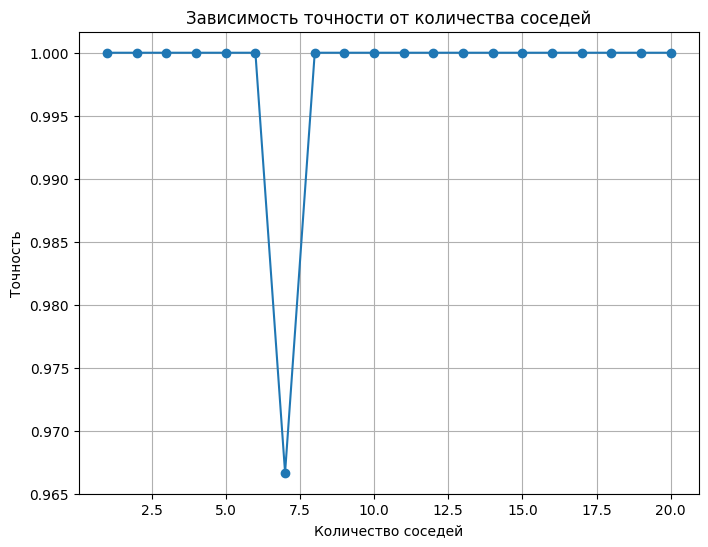

In [ ]:
from sklearn.metrics import accuracy_score

results = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    results.append({'k': k, 'accuracy': accuracy})

results_df = pd.DataFrame(results)

print(results_df)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(results_df['k'], results_df['accuracy'], marker='o')
plt.title("Зависимость точности от количества соседей")
plt.xlabel("Количество соседей")
plt.ylabel("Точность")
plt.grid()
plt.show()


Самое оптимально значение соседей: 1

### 2. KNN рукописный

#### 2.1. Возьмите два случайных тестовых объектов

In [ ]:
random_test_samples = X_test.sample(2, random_state=42)
random_test_samples

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
143,6.8,3.2,5.9,2.3
56,6.3,3.3,4.7,1.6


#### 2.2. Посчитайте для каждого расстояния до всех объектов из обучения

In [ ]:
from sklearn.metrics import euclidean_distances


distances = euclidean_distances(random_test_samples, X_train)
distances

array([[5.78100337, 5.06162029, 1.75499288, 5.19037571, 5.59732079,
        1.30766968, 1.66132477, 5.14003891, 5.29716906, 5.25071424,
        1.43178211, 1.7691806 , 1.44913767, 5.21727898, 5.09705797,
        2.97657521, 1.3       , 0.76157731, 1.77200451, 0.63245553,
        2.27815715, 1.1       , 2.01990099, 5.25737577, 1.30384048,
        2.48596058, 5.22111099, 5.33760246, 4.78121324, 3.48281495,
        1.32287566, 4.94469413, 5.11663952, 4.87647414, 2.36220236,
        5.16720427, 2.3130067 , 1.34907376, 5.43139025, 2.00249844,
        1.61245155, 5.22972275, 1.46287388, 1.43178211, 2.63438797,
        2.14476106, 0.80622577, 2.66645833, 4.86826458, 3.53553391,
        0.96436508, 5.28299158, 5.45343928, 2.86006993, 1.1045361 ,
        5.23354564, 1.3453624 , 5.20096145, 4.97091541, 1.50665192,
        3.6373067 , 0.2236068 , 1.42126704, 1.32287566, 0.94339811,
        2.60576284, 5.52358579, 5.8455111 , 1.75783958, 0.64807407,
        5.34976635, 5.21823725, 5.60089279, 1.54

In [ ]:
import pandas as pd

distances_df = pd.DataFrame(distances, columns=X_train.index, index=random_test_samples.index)

# расстояния для каждого тестового объекта
sorted_distances1 = distances_df.loc[random_test_samples.index[0]]
sorted_distances2 = distances_df.loc[random_test_samples.index[1]]

In [ ]:
distances_df

,22,15,65,11,42,146,51,27,4,32,...,87,74,121,149,20,71,106,14,92,102
143,5.781003,5.061620,1.754993,5.190376,5.597321,1.307670,1.661325,5.140039,5.297169,5.250714,...,2.076054,1.951922,1.640122,1.319091,4.90408,2.293469,2.533772,5.304715,2.485961,0.412311
56,4.316248,3.640055,0.574456,3.718871,4.140048,0.905539,0.264575,3.667424,3.824918,3.786819,...,1.086278,0.648074,0.969536,0.670820,3.43220,0.932738,1.627882,3.866523,1.178983,1.555635


#### 2.3. Выберите топ $k$ соседей для каждого объекта

In [ ]:
k = 5
print(sorted_distances1.sort_values().head(k))
print(sorted_distances2.sort_values().head(k))

120    0.223607
124    0.316228
144    0.316228
140    0.346410
102    0.412311
Name: 143, dtype: float64
51    0.264575
85    0.374166
91    0.424264
86    0.458258
70    0.469042
Name: 56, dtype: float64


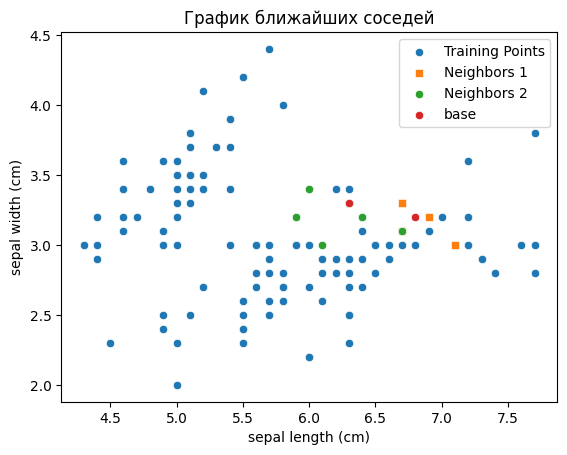

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Индексы ближайших соседей
indices1 = sorted_distances1.sort_values().head(k).index
indices2 = sorted_distances2.sort_values().head(k).index

# Выбор точек из X_train на основе индексов
neighbors1 = X_train.loc[indices1]
neighbors2 = X_train.loc[indices2]

# Создайте scatterplot для точек из X_train
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=X_train, label='Training Points')

# Добавьте точки ближайших соседей с разными маркерами
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=neighbors1, label='Neighbors 1', marker='s')
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=neighbors2, label='Neighbors 2', marker='o')
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=random_test_samples, label='base', marker='o')

# Добавьте легенду
plt.legend()
plt.title("График ближайших соседей")
plt.show()


Для отображения нужно 4ех мерное пространство,но мы можем наблюдать только 3 оси, поэтому в качестве 4го измерения возьмем параметр цвета.

In [ ]:
import plotly.express as px

# Создаем трехмерный график
fig = px.scatter_3d(X_train, y='sepal length (cm)', x='sepal width (cm)', z='petal length (cm)', color='petal width (cm)',  size_max=10)

fig.add_trace(px.scatter_3d(neighbors1, y='sepal length (cm)', x='sepal width (cm)', z='petal length (cm)',  size_max=10).data[0])
fig.add_trace(px.scatter_3d(neighbors2, y='sepal length (cm)', x='sepal width (cm)', z='petal length (cm)', size_max=10).data[0])

fig.show()

#### 2.4. Выведите финальное предсказание для двух объектов основываясь на соседях

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

# Для первого тестового объекта
prediction1 = knn_classifier.predict(X_test.loc[random_test_samples.index[0]].values.reshape(1, -1))

# Для второго тестового объекта
prediction2 = knn_classifier.predict(X_test.loc[random_test_samples.index[1]].values.reshape(1, -1))

print("Предсказание для первого тестового объекта:", prediction1)
print("Предсказание для второго тестового объекта:", prediction2)

Предсказание для первого тестового объекта: [2]
Предсказание для второго тестового объекта: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



#### 2.5. Сравните с настоящими целевыми значениями этих двух объектов

In [ ]:
object2_index = X_test.index.get_loc(random_test_samples.index[1])
object1_index = X_test.index.get_loc(random_test_samples.index[0])

print("Истинное значение первого тестового объекта:", y_test[object1_index]
)
print("Истинное значение второго тестового объекта:", y_test[object2_index]
)

27
15
Истинное значение первого тестового объекта: 2
Истинное значение второго тестового объекта: 1


## KNN для регрессии

### Получение данных


Будем работать с набором данных для задачи регрессии - данные по предсказанию стоимости недвижимости.

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np


data = fetch_california_housing()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


### KNN из sklearn

#### 3.1. Разбейте данные на обучение и тест

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Затем нормализуйте данные:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)

X_train = pd.DataFrame(mms.transform(X_train[X_train.columns]), columns=X_train.columns)
X_test = pd.DataFrame(mms.transform(X_test[X_train.columns]), columns=X_train.columns)

In [ ]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.190322,0.627451,0.029278,0.026601,0.064380,0.002414,0.017021,0.729084
1,0.228452,0.941176,0.025419,0.027968,0.036744,0.000842,0.129787,0.616534
2,0.252162,0.058824,0.033732,0.025759,0.025561,0.001634,0.224468,0.385458
3,0.099488,0.686275,0.022081,0.027683,0.039659,0.002657,0.014894,0.721116
4,0.210638,0.823529,0.038147,0.031651,0.024412,0.001294,0.450000,0.453187


#### 3.2. Обучите модель KNN


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

k = 5
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

#### 3.3. Проверьте качество работы модели

In [ ]:
pred_test = knn_regressor.predict(X_test)
pred_test

array([0.5482  , 0.7506  , 4.628604, ..., 4.837608, 0.712   , 2.2482  ])

In [ ]:
from sklearn.metrics import r2_score #коэффициент детерминации (R2 = 1 - (mse_model / mse_mean) )

r2_score(pred_test, y_test) # Чем меньше средняя квдратичная ошибка, тем R2 больше (ближе к единице), тем выше качество модели.
                            # Если R2 отрицательна, то модель работает хуже, чем простой подсчет среднего.
                            # Если R2 = 0, модель работает так же, как среднее

0.5952689432261666

#### 3.4. Поэкспериментируйте с количеством соседей

1. Обучите модели с разным кол-вом соседей
2. Посчитайте метрику на тестовой выборке
3. Соберите данные в таблицу/график для наглядности
4. Выберите самое оптимальное значение $k$

     k  r2_score
0    1  0.532965
1    2  0.642475
2    3  0.669759
3    4  0.681789
4    5  0.689453
5    6  0.694491
6    7  0.697602
7    8  0.699584
8    9  0.696891
9   10  0.698048
10  11  0.697618
11  12  0.697405
12  13  0.695918
13  14  0.694387
14  15  0.693543
15  16  0.692009
16  17  0.690930
17  18  0.690957
18  19  0.689465
19  20  0.689350


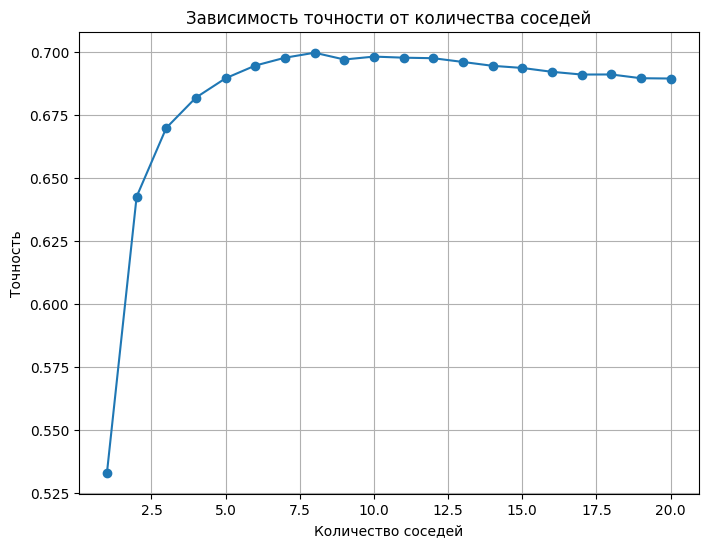

Самое оптимальное значение соседей: 8


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
results = []

for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    accuracy = r2_score(y_test, y_pred)
    results.append({'k': k, 'r2_score': accuracy})

results_df = pd.DataFrame(results)

print(results_df)


plt.figure(figsize=(8, 6))
plt.plot(results_df['k'], results_df['r2_score'], marker='o')
plt.title("Зависимость точности от количества соседей")
plt.xlabel("Количество соседей")
plt.ylabel("Точность")
plt.grid()
plt.show()

max_r2_row = results_df[results_df['r2_score'] == results_df['r2_score'].max()]
max_k = max_r2_row['k'].values[0]

print('Самое оптимальное значение соседей:', max_k)

### 4. KNN рукописный

#### 4.1. Возьмите два случайных тестовых объектов

In [ ]:
random_test_samples = X_test.sample(2, random_state=42)
random_test_samples

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
949,0.160060,0.627451,0.022423,0.032598,0.020628,0.000960,0.172340,0.594622
3168,0.266286,0.196078,0.032129,0.024884,0.018274,0.001612,0.267021,0.381474


#### 4.2. Посчитайте для каждого расстояния до всех объектов из обучения

In [ ]:
from sklearn.metrics import euclidean_distances


distances = euclidean_distances(random_test_samples, X_train)
distances

array([[0.21241259, 0.32508806, 0.61521219, ..., 0.06758012, 0.65146199,
        0.67118014],
       [0.61426601, 0.79440861, 0.1446426 , ..., 0.55541747, 0.32926995,
        0.8852299 ]])

In [ ]:
import pandas as pd

distances_df = pd.DataFrame(distances, columns=X_train.index, index=random_test_samples.index)

# расстояния для каждого тестового объекта
sorted_distances1 = distances_df.loc[random_test_samples.index[0]]
sorted_distances2 = distances_df.loc[random_test_samples.index[1]]

In [ ]:
distances_df

,0,1,2,3,4,5,6,7,8,9,...,16502,16503,16504,16505,16506,16507,16508,16509,16510,16511
949,0.212413,0.325088,0.615212,0.219792,0.371976,0.613754,0.110536,0.680203,0.558632,0.653185,...,0.221457,0.220177,0.313821,0.573139,0.084679,0.255398,0.103376,0.067580,0.651462,0.67118
3168,0.614266,0.794409,0.144643,0.669033,0.659951,0.373664,0.451655,0.674258,0.361730,0.425264,...,0.394462,0.526654,0.336194,0.658316,0.531971,0.569414,0.549928,0.555417,0.329270,0.88523


#### 4.3. Выберите топ $k$ соседей для каждого объекта

In [ ]:
k = 8
print(sorted_distances1.sort_values().head(k))
print(sorted_distances2.sort_values().head(k))

2798     0.013251
16222    0.017777
13540    0.023243
13208    0.024906
8558     0.025110
7641     0.029611
13060    0.032284
4605     0.032336
Name: 949, dtype: float64
1956     0.050830
7076     0.054635
7211     0.063810
10501    0.065979
4174     0.072752
15420    0.073410
213      0.076246
15546    0.076432
Name: 3168, dtype: float64


#### 4.4. Выведите финальное предсказание для двух объектов основываясь на соседях

In [ ]:
knn_classifier = KNeighborsRegressor(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

# Для первого тестового объекта
prediction1 = knn_classifier.predict(X_test.loc[random_test_samples.index[0]].values.reshape(1, -1))

# Для второго тестового объекта
prediction2 = knn_classifier.predict(X_test.loc[random_test_samples.index[1]].values.reshape(1, -1))

print("Предсказание для первого тестового объекта:", prediction1)
print("Предсказание для второго тестового объекта:", prediction2)

Предсказание для первого тестового объекта: [2.253125]
Предсказание для второго тестового объекта: [2.1015]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



#### 4.5. Сравните с настоящими целевыми значениями этих двух объектов

In [ ]:
object2_index = X_test.index.get_loc(random_test_samples.index[1])
object1_index = X_test.index.get_loc(random_test_samples.index[0])

print("Истинное значение первого тестового объекта:", y_test[object1_index])
print("Истинное значение второго тестового объекта:", y_test[object2_index])

Истинное значение первого тестового объекта: 2.385
Истинное значение второго тестового объекта: 3.297


Предсказания отклоняются от истины, но не так сильно, они довольно близки.

# Weighted KNN

## KNN для классификации

### Получение данных

Будем работать с набором данным `iris` из `sklearn`.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

data = load_iris()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Выберите только 0 и 3 признак (sepal length (cm) и petal width (cm))

In [ ]:
selected_features = pd.DataFrame(X.iloc[:, [0, 3]])
selected_features

,sepal length (cm),petal width (cm)
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2
...,...,...
145,6.7,2.3
146,6.3,1.9
147,6.5,2.0
148,6.2,2.3


### Визуализируйте ваши данные на графике

Text(0.5, 1.0, 'Scatter Plot of Sepal Length and Petal Width')

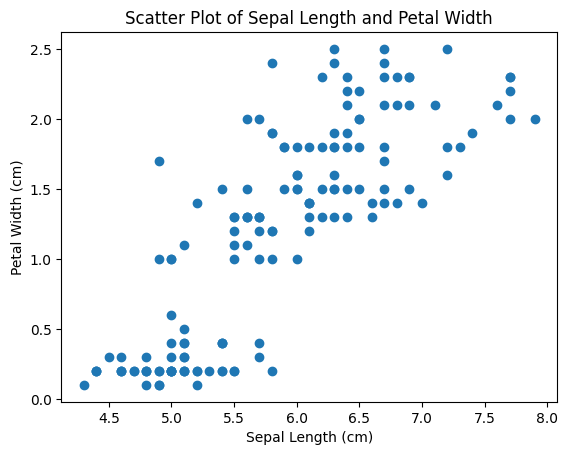

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(selected_features['sepal length (cm)'],selected_features['petal width (cm)'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Scatter Plot of Sepal Length and Petal Width')

### 1. KNN из sklearn

#### 1.1. Разбейте данные на обучение и тест

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 1.2. Обучите модель KNN на 50 соседях

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)

# Обучим модель
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=50)

#### 1.3. Проверьте качество работы модели

In [ ]:
prediction = knn.predict(X_test)
prediction

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, prediction)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



#### 1.4. Возьмите один случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [ ]:
random_test_sample = X_test.sample(1, random_state=42)
random_test_sample

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
143,6.8,3.2,5.9,2.3


In [ ]:
from sklearn.metrics import euclidean_distances


distances = euclidean_distances(random_test_sample, X_train)
distances

array([[5.78100337, 5.06162029, 1.75499288, 5.19037571, 5.59732079,
        1.30766968, 1.66132477, 5.14003891, 5.29716906, 5.25071424,
        1.43178211, 1.7691806 , 1.44913767, 5.21727898, 5.09705797,
        2.97657521, 1.3       , 0.76157731, 1.77200451, 0.63245553,
        2.27815715, 1.1       , 2.01990099, 5.25737577, 1.30384048,
        2.48596058, 5.22111099, 5.33760246, 4.78121324, 3.48281495,
        1.32287566, 4.94469413, 5.11663952, 4.87647414, 2.36220236,
        5.16720427, 2.3130067 , 1.34907376, 5.43139025, 2.00249844,
        1.61245155, 5.22972275, 1.46287388, 1.43178211, 2.63438797,
        2.14476106, 0.80622577, 2.66645833, 4.86826458, 3.53553391,
        0.96436508, 5.28299158, 5.45343928, 2.86006993, 1.1045361 ,
        5.23354564, 1.3453624 , 5.20096145, 4.97091541, 1.50665192,
        3.6373067 , 0.2236068 , 1.42126704, 1.32287566, 0.94339811,
        2.60576284, 5.52358579, 5.8455111 , 1.75783958, 0.64807407,
        5.34976635, 5.21823725, 5.60089279, 1.54

#### 1.5. Выберите топ  k  соседей


In [ ]:
distances_df = pd.DataFrame(distances, columns=X_train.index, index=random_test_sample.index)
sorted_distances = distances_df.loc[random_test_sample.index[0]].sort_values()

k = 5
print(sorted_distances.head(k))

120    0.223607
124    0.316228
144    0.316228
140    0.346410
102    0.412311
Name: 143, dtype: float64


In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

#### 1.6. Выведите финальное предсказание для этого объекта

In [ ]:
prediction = knn_classifier.predict(X_test.loc[random_test_sample.index[0]].values.reshape(1, -1))
print('Предсказанное значение:',prediction)

Предсказанное значение: [2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


#### 1.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`

In [ ]:
indx = X_test.index.get_loc(random_test_sample.index[0])

In [ ]:
print("Истинное значение:", y_test[indx])

Истинное значение: 2


#### 1.8 Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей

In [ ]:
X_train.loc[sorted_distances.head(k).index]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
120,6.9,3.2,5.7,2.3
124,6.7,3.3,5.7,2.1
144,6.7,3.3,5.7,2.5
140,6.7,3.1,5.6,2.4
102,7.1,3.0,5.9,2.1


In [ ]:
random_test_sample

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
143,6.8,3.2,5.9,2.3


Text(0.5, 1.0, 'Scatter Plot of Sepal Length and Petal Width')

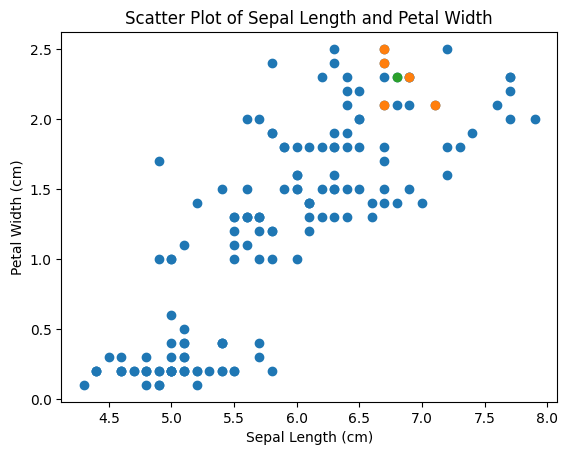

In [ ]:
plt.scatter(selected_features['sepal length (cm)'],selected_features['petal width (cm)'])
plt.scatter(X_train.loc[sorted_distances.head(k).index]['sepal length (cm)'],
            X_train.loc[sorted_distances.head(k).index]['petal width (cm)'])
plt.scatter(random_test_sample['sepal length (cm)'],random_test_sample['petal width (cm)'])

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Scatter Plot of Sepal Length and Petal Width')

In [ ]:
import plotly.express as px

# Создаем трехмерный график
fig = px.scatter_3d(X_train, y='sepal length (cm)', x='sepal width (cm)', z='petal length (cm)', color='petal width (cm)',  size_max=10)

fig.add_trace(px.scatter_3d(X_train.loc[sorted_distances.head(k).index], y='sepal length (cm)', x='sepal width (cm)', z='petal length (cm)',  size_max=10).data[0])
fig.add_trace(px.scatter_3d(random_test_sample, y='sepal length (cm)', x='sepal width (cm)', z='petal length (cm)'))
fig.show()

### 2. Weighted KNN

#### 2.1. Обучите модель "взвешенный KNN" по дистанции

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

knn.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

#### 2.2. Проверьте качество работы модели


In [ ]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


#### 2.3. Возьмите тот же случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [ ]:
from sklearn.metrics import euclidean_distances


distances = euclidean_distances(random_test_sample, X_train)
distances

array([[5.78100337, 5.06162029, 1.75499288, 5.19037571, 5.59732079,
        1.30766968, 1.66132477, 5.14003891, 5.29716906, 5.25071424,
        1.43178211, 1.7691806 , 1.44913767, 5.21727898, 5.09705797,
        2.97657521, 1.3       , 0.76157731, 1.77200451, 0.63245553,
        2.27815715, 1.1       , 2.01990099, 5.25737577, 1.30384048,
        2.48596058, 5.22111099, 5.33760246, 4.78121324, 3.48281495,
        1.32287566, 4.94469413, 5.11663952, 4.87647414, 2.36220236,
        5.16720427, 2.3130067 , 1.34907376, 5.43139025, 2.00249844,
        1.61245155, 5.22972275, 1.46287388, 1.43178211, 2.63438797,
        2.14476106, 0.80622577, 2.66645833, 4.86826458, 3.53553391,
        0.96436508, 5.28299158, 5.45343928, 2.86006993, 1.1045361 ,
        5.23354564, 1.3453624 , 5.20096145, 4.97091541, 1.50665192,
        3.6373067 , 0.2236068 , 1.42126704, 1.32287566, 0.94339811,
        2.60576284, 5.52358579, 5.8455111 , 1.75783958, 0.64807407,
        5.34976635, 5.21823725, 5.60089279, 1.54

#### 2.4. Выберите топ  k  соседей


In [ ]:
distances_df = pd.DataFrame(distances, columns=X_train.index, index=random_test_sample.index)
sorted_distances = distances_df.loc[random_test_sample.index[0]].sort_values()[::-1]

k = 5
print(sorted_distances.head(k))

13    5.845511
22    5.781003
38    5.600893
42    5.597321
41    5.591064
Name: 143, dtype: float64


#### 2.5. Рассчитайте вес для каждого соседа

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=k, weights='distance')
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

#### 2.6. Выведите финальное предсказание для этого объекта

In [ ]:
y_pred = knn_classifier.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

#### 2.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`

In [ ]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


#### 2.8. Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей по удаленности

Text(0.5, 1.0, 'Scatter Plot of Sepal Length and Petal Width')

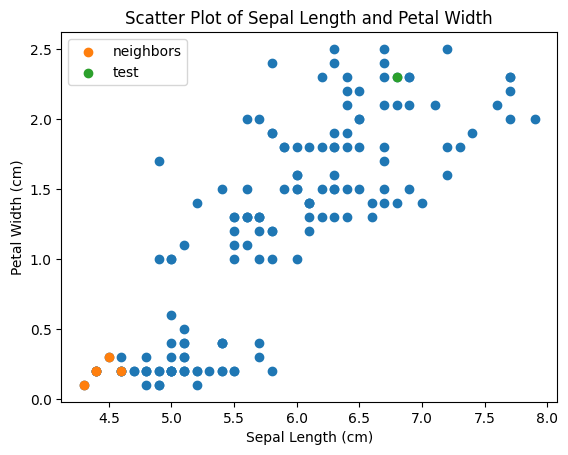

In [ ]:
plt.scatter(selected_features['sepal length (cm)'],selected_features['petal width (cm)'])
plt.scatter(X_train.loc[sorted_distances.head(k).index]['sepal length (cm)'],
            X_train.loc[sorted_distances.head(k).index]['petal width (cm)'],label = 'neighbors')
plt.scatter(random_test_sample['sepal length (cm)'],random_test_sample['petal width (cm)'],label = 'test')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.title('Scatter Plot of Sepal Length and Petal Width')

## 3. Еще одна задача классификации

### Получение данных

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
import pandas as pd


data = fetch_olivetti_faces(shuffle=True, random_state=9)

X = pd.DataFrame(data['data'])
y = data['target']

X.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.723140,0.710744,0.714876,0.731405,0.735537,0.752066,0.772727,0.793388,0.814050,0.834711,...,0.793388,0.904959,0.549587,0.409091,0.491736,0.487603,0.471074,0.483471,0.475207,0.475207
1,0.289256,0.157025,0.148760,0.190083,0.169421,0.194215,0.404959,0.607438,0.669421,0.677686,...,0.438017,0.400826,0.421488,0.429752,0.433884,0.425620,0.438017,0.438017,0.210744,0.206612
2,0.586777,0.595041,0.681818,0.694215,0.714876,0.698347,0.714876,0.727273,0.743802,0.739669,...,0.495868,0.380165,0.400826,0.330579,0.148760,0.119835,0.123967,0.115702,0.119835,0.107438
3,0.235537,0.351240,0.479339,0.545455,0.566116,0.566116,0.595041,0.607438,0.619835,0.623967,...,0.169421,0.198347,0.202479,0.214876,0.202479,0.214876,0.214876,0.214876,0.210744,0.206612
4,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893


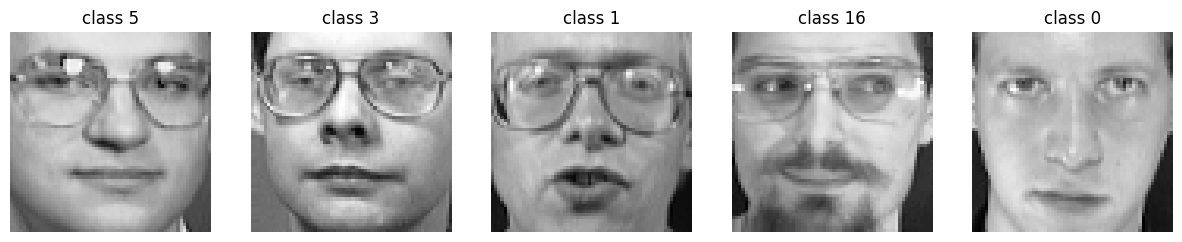

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 5, figsize=(15, 8))

for i in range(0, 5):
    ax[i].imshow(X.iloc[i].values.reshape((64, 64)), cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(f'class {y[i]}')

plt.show()

In [ ]:
y

array([ 5,  3,  1, 16,  0,  1, 12,  9, 26, 37, 20,  5, 10, 27, 10, 34, 13,
       26, 17, 31,  9,  7, 31, 37, 31, 35, 18, 29, 29,  4, 21, 20, 23,  7,
        9, 18, 22,  2,  1, 39, 36,  8, 34, 32,  3, 20,  3,  9, 37, 32, 34,
       15,  9, 16, 36, 16, 13,  7, 29,  6, 13,  4, 16,  0,  8,  1, 25,  3,
       18, 29,  8, 35,  2, 25, 21, 31, 35, 23, 30, 28,  4, 10, 11, 27, 29,
       39,  5, 12, 29, 26, 15,  2, 39,  6, 30, 37, 25, 32, 35, 24, 15, 24,
        2, 19, 22,  0, 38,  5, 22, 28,  6, 38,  6,  3, 33, 12, 36,  8, 27,
       19, 25, 36, 10, 37,  9, 33, 10, 28, 32, 34, 17, 23, 19, 24, 27,  3,
       39, 30,  3,  7,  3, 30, 12, 21, 17, 14, 35, 21, 19,  5, 32, 16, 19,
        8, 33, 14, 17, 15, 22, 38, 15, 18,  7, 14, 28, 39, 23, 36, 28, 10,
       39, 36, 37, 10, 34, 25, 18, 13, 19, 33, 33, 13, 26,  9, 13, 34, 24,
        0, 30, 23,  2, 22,  9, 11,  7, 35, 19, 26, 32, 11,  7,  7,  0,  4,
        0,  2,  0, 26, 21, 14,  4, 32,  1, 23, 16,  0,  7, 14, 16, 15, 39,
       17, 33, 30, 37, 17

### 3.1. KNN из sklearn

#### 3.1.1. Разбейте данные на обучение и тест

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 3.1.2. Обучите модель KNN на 50 соседях

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)

# Обучим модель
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=50)

#### 3.1.3. Проверьте качество работы модели


In [ ]:
prediction = knn.predict(X_test)
prediction

array([14, 26, 15, 24, 17,  8, 17, 29, 29, 10, 24, 18, 13, 24, 29, 29,  8,
       33, 17, 37, 23, 24,  5, 26, 15, 15, 33, 17, 17, 24, 24,  8, 28,  7,
       24, 36, 17, 33, 22, 14, 26, 24,  6,  4,  4, 14,  4, 13, 26, 10, 14,
       14,  8,  8, 12,  8, 14,  4, 33, 14,  9, 32, 22, 29, 24, 29, 17, 14,
       24, 13, 20, 14, 14, 28, 24,  8,  7, 29, 10,  8])

In [ ]:
y_test

array([14, 11,  7,  4,  6, 29, 17, 30, 29, 10, 37, 18, 13,  2, 19, 34,  8,
       21, 25, 34, 23, 34,  5,  1,  5,  5, 33, 17,  2, 22, 25, 11, 28,  7,
        5, 36,  3, 21, 22, 30, 31, 16, 35, 35, 11, 18, 19, 13, 31, 10,  3,
        1, 11,  8, 12, 39, 30, 37, 21, 19,  9, 38,  2, 30, 24, 20, 12, 30,
       12, 25, 20,  3,  1, 20, 24, 11,  7, 20, 18, 11])

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, prediction)
print(report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       1.00      0.25      0.40         4
           6       0.00      0.00      0.00         1
           7       1.00      0.67      0.80         3
           8       0.25      1.00      0.40         2
           9       1.00      1.00      1.00         1
          10       0.67      1.00      0.80         2
          11       0.00      0.00      0.00         6
          12       1.00      0.33      0.50         3
          13       0.67      1.00      0.80         2
          14       0.10      1.00      0.18         1
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1
          17       0.29      1.00      0.44         2
          18       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to cont

### 3.2. Weighted KNN

#### 3.2.1. Обучите модель взвешенный KNN по дистанции

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50,weights='distance' )

# Обучим модель
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=50, weights='distance')

#### 3.2.2. Проверьте качество работы модели


In [ ]:
y_pred = knn.predict(X_test)
y_pred

array([14, 26,  7, 24,  6, 29, 17, 29, 29, 10, 37, 18, 13, 24, 29, 29,  8,
       21, 17, 37, 23, 24,  5,  1,  5,  5, 33, 17, 22, 22, 25,  8, 28,  7,
        5, 36, 17, 21, 22, 14, 31, 25, 35, 35, 39, 14,  4, 13, 26, 10, 14,
       14,  8,  8, 12,  8, 14,  4, 38, 29,  9, 38, 22, 30, 24, 29, 17, 14,
       24, 24, 20, 14,  1, 20, 24,  8,  7, 29, 10,  8])

In [ ]:
y_test

array([14, 11,  7,  4,  6, 29, 17, 30, 29, 10, 37, 18, 13,  2, 19, 34,  8,
       21, 25, 34, 23, 34,  5,  1,  5,  5, 33, 17,  2, 22, 25, 11, 28,  7,
        5, 36,  3, 21, 22, 30, 31, 16, 35, 35, 11, 18, 19, 13, 31, 10,  3,
        1, 11,  8, 12, 39, 30, 37, 21, 19,  9, 38,  2, 30, 24, 20, 12, 30,
       12, 25, 20,  3,  1, 20, 24, 11,  7, 20, 18, 11])

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3
           8       0.29      1.00      0.44         2
           9       1.00      1.00      1.00         1
          10       0.67      1.00      0.80         2
          11       0.00      0.00      0.00         6
          12       1.00      0.33      0.50         3
          13       1.00      1.00      1.00         2
          14       0.12      1.00      0.22         1
          16       0.00      0.00      0.00         1
          17       0.40      1.00      0.57         2
          18       1.00      0.33      0.50         3
          19       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to cont

### 3.3. Custom Weighted KNN

#### 3.3.1. Напишите свою функцию подсчета весов по дистанции

(Можете выбрать любой подход)

In [ ]:
def calculate_distance_weights(distances):

    distances = np.where(distances == 0, 1e-6, distances)

    weights = 1.0 / distances

    return weights

#### 3.3.2. Обучите модель взвешенный KNN по написанной функции выше

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, weights=calculate_distance_weights)

knn.fit(X_train, y_train)

KNeighborsClassifier(weights=<function calculate_distance_weights at 0x783244f32680>)

#### 3.3.3. Проверьте качество работы модели


In [ ]:
y_pred = knn.predict(X_test)
y_pred

array([14, 12,  7,  4,  6, 29, 17, 30, 29, 10, 37, 18, 13,  2, 14, 29,  8,
       21, 22, 34, 23, 34,  5,  1,  5,  5, 33, 17, 22, 22, 25, 17, 28,  7,
        5, 36, 22, 21, 22, 30, 31, 24,  6, 35, 11, 18, 19, 13, 31, 10, 22,
        1, 39,  8, 12, 39, 30, 37, 21, 19,  9, 38, 12, 30, 24, 20, 12, 30,
       14, 25, 20, 14,  1, 20, 24, 39,  7, 20, 18, 11])

In [ ]:
y_test

array([14, 11,  7,  4,  6, 29, 17, 30, 29, 10, 37, 18, 13,  2, 19, 34,  8,
       21, 25, 34, 23, 34,  5,  1,  5,  5, 33, 17,  2, 22, 25, 11, 28,  7,
        5, 36,  3, 21, 22, 30, 31, 16, 35, 35, 11, 18, 19, 13, 31, 10,  3,
        1, 11,  8, 12, 39, 30, 37, 21, 19,  9, 38,  2, 30, 24, 20, 12, 30,
       12, 25, 20,  3,  1, 20, 24, 11,  7, 20, 18, 11])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8125


## KNN для регрессии

### Получение данных


Будем работать с набором данных для задачи регрессии - данные по предсказанию стоимости недвижимости.

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np


data = fetch_california_housing()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

### Возьмите только признак MedInc и 1000 первых строк

In [ ]:
selected_features = pd.DataFrame(X.iloc[:, 0])[:1000]
y_selected = pd.DataFrame(y[:1000])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(selected_features,y_selected)

### Отрисуйте данные на графике

Text(0.5, 0, 'Значение "MedInc"')

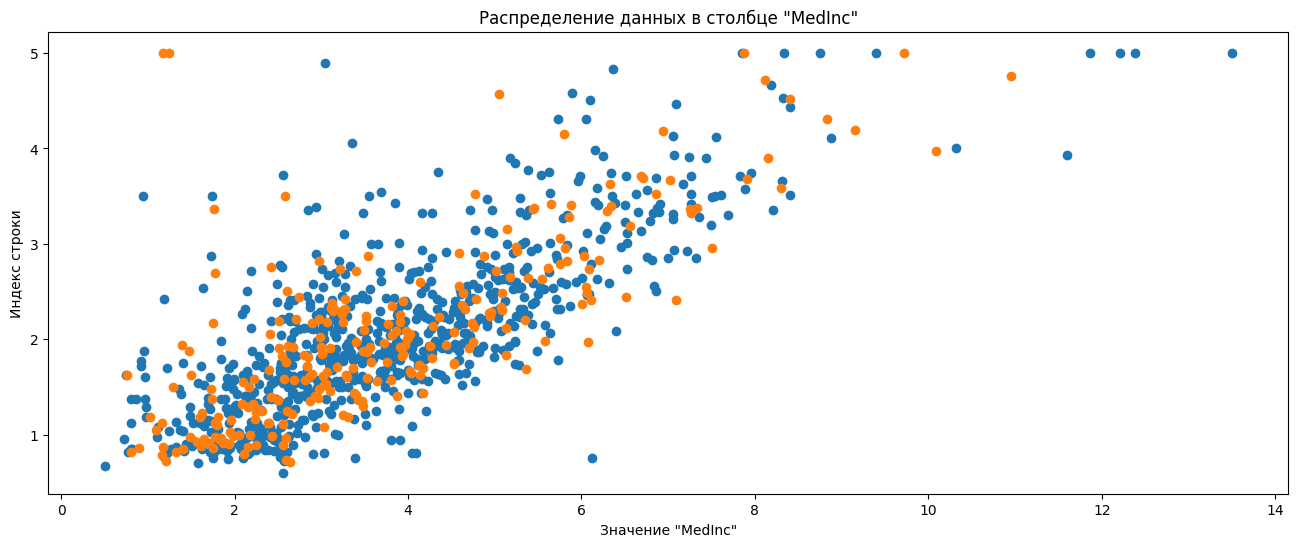

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
plt.scatter(X_train,y_train)
plt.scatter(X_test,y_test)

plt.title('Распределение данных в столбце "MedInc"')
plt.ylabel('Индекс строки')
plt.xlabel('Значение "MedInc"')

### 4. KNN из sklearn

#### 4.1. Разбейте данные на обучение и тест

In [ ]:
selected_features = pd.DataFrame(X.iloc[:, 0])[:1000]
y_selected = pd.DataFrame(y[:1000])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(selected_features,y_selected, random_state=12)

#### 4.2. Обучите модель KNN на 100 соседях


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=100)

# Обучим модель
knn_regressor.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=100)

#### 4.3. Проверьте качество работы модели


In [ ]:
pred_test = knn_regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score #коэффициент детерминации (R2 = 1 - (mse_model / mse_mean) )

r2_score(pred_test, y_test) # Чем меньше средняя квдратичная ошибка, тем R2 больше (ближе к единице), тем выше качество модели.
                            # Если R2 отрицательна, то модель работает хуже, чем простой подсчет среднего.
                            # Если R2 = 0, модель работает так же, как среднее

0.0001957284321973951

#### 4.4. Возьмите один случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [ ]:
from random import randint
random_test_sample = X_test.sample(1, random_state=42)
random_test_sample

,MedInc
950,4.9107


In [ ]:
from sklearn.metrics import euclidean_distances

distances = euclidean_distances(random_test_sample, X_train)

#### 4.5. Выберите топ  k  соседей


In [ ]:
distances_df = pd.DataFrame(distances, columns=X_train.index, index=random_test_sample.index)
sorted_distances = distances_df.loc[random_test_sample.index[0]].sort_values()

k = 50
neighbors = sorted_distances.head(k)

print(neighbors)

929    0.0011
410    0.0024
617    0.0028
874    0.0145
105    0.0199
999    0.0268
564    0.0396
222    0.0452
580    0.0694
945    0.0760
980    0.0772
595    0.0870
911    0.0893
880    0.0893
641    0.0893
367    0.0893
665    0.0936
952    0.1036
883    0.1055
610    0.1071
703    0.1294
838    0.1299
914    0.1316
550    0.1329
491    0.1356
223    0.1386
153    0.1399
291    0.1399
574    0.1412
594    0.1412
401    0.1444
675    0.1498
975    0.1570
900    0.1607
941    0.1632
227    0.1667
917    0.1717
936    0.1731
110    0.1810
835    0.1863
521    0.1919
557    0.1932
769    0.1964
899    0.1972
807    0.1998
801    0.2024
225    0.2077
875    0.2129
933    0.2214
770    0.2232
Name: 950, dtype: float64


In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=50)

#### 4.6. Выведите финальное предсказание для этого объекта

In [ ]:
prediction = knn_regressor.predict(X_test.loc[random_test_sample.index[0]].values.reshape(1, -1))

print('Предсказанное значение:',prediction)

Предсказанное значение: [[2.46134]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


#### 4.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`

In [ ]:
print("Истинное значение:", y_test.loc[random_test_sample.index[0]])

Истинное значение: 0    2.138
Name: 950, dtype: float64


#### 4.8 Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей

Text(0, 0.5, 'Значение "MedInc"')

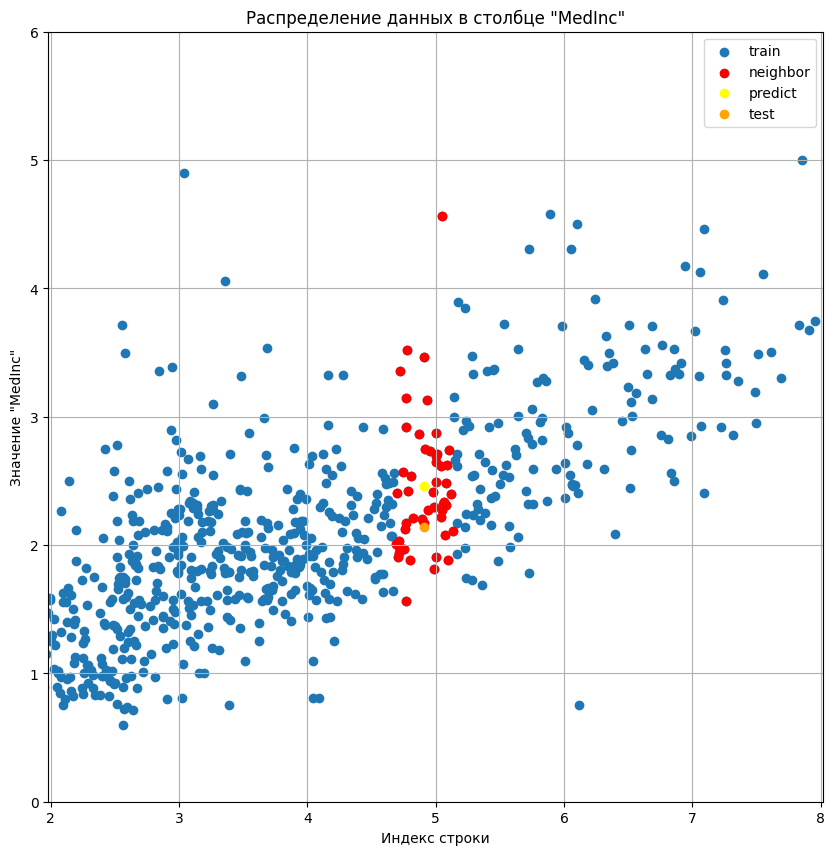

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.scatter(X_train, y_train, label ='train')
plt.scatter(X_train.loc[neighbors.index],y_train.loc[neighbors.index],
            color = 'red' , label = 'neighbor')
plt.scatter(X_test.loc[random_test_sample.index[0]],prediction, color= 'yellow', label = 'predict')
plt.scatter(X_test.loc[random_test_sample.index[0]],y_test.loc[random_test_sample.index[0]], color= 'orange', label = 'test')

plt.axis( 'equal')
plt.title('Распределение данных в столбце "MedInc"')
plt.legend()
plt.axis([4, 6, 0, 6])
plt.grid()
plt.xlabel('Значение "MedInc"')
plt.ylabel('Предсказание Цены')

### 5. Weighted KNN

#### 5.1. Обучите модель взвешенный KNN по дистанции

In [ ]:
selected_features = pd.DataFrame(X.iloc[:, 0])[:1000]
y_selected = pd.DataFrame(y[:1000])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(selected_features,y_selected, random_state=12)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=100, weights='distance')

# Обучим модель
knn_regressor.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=100, weights='distance')

#### 5.2. Проверьте качество работы модели


In [ ]:
pred_test = knn_regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score #коэффициент детерминации (R2 = 1 - (mse_model / mse_mean) )

r2_score(pred_test, y_test) # Чем меньше средняя квдратичная ошибка, тем R2 больше (ближе к единице), тем выше качество модели.
                            # Если R2 отрицательна, то модель работает хуже, чем простой подсчет среднего.
                            # Если R2 = 0, модель работает так же, как среднее

0.2733339411653133

#### 5.3. Возьмите тот же случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [ ]:
from random import randint
random_test_sample = X_test.sample(1, random_state=42)
random_test_sample

,MedInc
950,4.9107


In [ ]:
from sklearn.metrics import euclidean_distances

distances = euclidean_distances(random_test_sample, X_train)

#### 5.4. Выберите топ  k  соседей


In [ ]:
distances_df = pd.DataFrame(distances, columns=X_train.index, index=random_test_sample.index)
sorted_distances = distances_df.loc[random_test_sample.index[0]].sort_values()

k = 50
neighbors = sorted_distances.head(k)

print(neighbors)

929    0.0011
410    0.0024
617    0.0028
874    0.0145
105    0.0199
999    0.0268
564    0.0396
222    0.0452
580    0.0694
945    0.0760
980    0.0772
595    0.0870
911    0.0893
880    0.0893
641    0.0893
367    0.0893
665    0.0936
952    0.1036
883    0.1055
610    0.1071
703    0.1294
838    0.1299
914    0.1316
550    0.1329
491    0.1356
223    0.1386
153    0.1399
291    0.1399
574    0.1412
594    0.1412
401    0.1444
675    0.1498
975    0.1570
900    0.1607
941    0.1632
227    0.1667
917    0.1717
936    0.1731
110    0.1810
835    0.1863
521    0.1919
557    0.1932
769    0.1964
899    0.1972
807    0.1998
801    0.2024
225    0.2077
875    0.2129
933    0.2214
770    0.2232
Name: 950, dtype: float64


#### 5.5. Рассчитайте вес для каждого соседа

In [ ]:
def calculate_distance_weights(distances):

    distances = np.where(distances == 0, 1e-6, distances)

    weights = 1.0 / distances

    return weights

In [ ]:
knn = KNeighborsRegressor(n_neighbors=k, weights=calculate_distance_weights)

knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=50,
                    weights=<function calculate_distance_weights at 0x7ba1c7bf29e0>)

#### 5.6. Выведите финальное предсказание для этого объекта

In [ ]:
prediction = knn.predict(X_test.loc[random_test_sample.index[0]].values.reshape(1, -1))
print('Предсказанное значение:',prediction)

Предсказанное значение: [[2.58546226]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


#### 5.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`

In [ ]:
print("Истинное значение:", y_test.loc[random_test_sample.index[0]])

Истинное значение: 0    2.138
Name: 950, dtype: float64


#### 5.8. Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей по удаленности

Text(0, 0.5, 'Предсказание Цены')

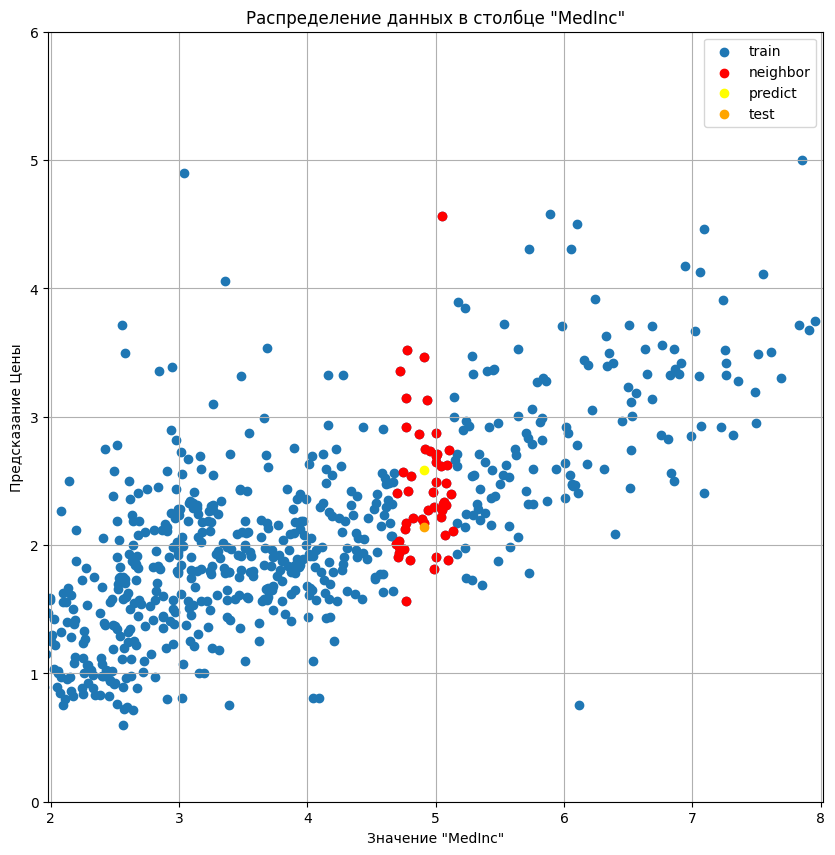

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.scatter(X_train, y_train, label ='train')
plt.scatter(X_train.loc[neighbors.index],y_train.loc[neighbors.index],
            color = 'red' , label = 'neighbor')
plt.scatter(X_test.loc[random_test_sample.index[0]],prediction, color= 'yellow', label = 'predict')
plt.scatter(X_test.loc[random_test_sample.index[0]],y_test.loc[random_test_sample.index[0]], color= 'orange', label = 'test')

plt.axis( 'equal')
plt.title('Распределение данных в столбце "MedInc"')
plt.legend()
plt.axis([4, 6, 0, 6])
plt.grid()
plt.xlabel('Значение "MedInc"')
plt.ylabel('Предсказание Цены')

## 6. Еще одна задача регрессии

### Получение данных

Будем работать с тем же самым набором данным `fetch_olivetti_faces` из `sklearn`, но уже для задачи регрессии - будем восстанавливать изображение.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_olivetti_faces
import pandas as pd

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [ ]:
n_pixels = data.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]


X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

Вот один пример обучающей пары.

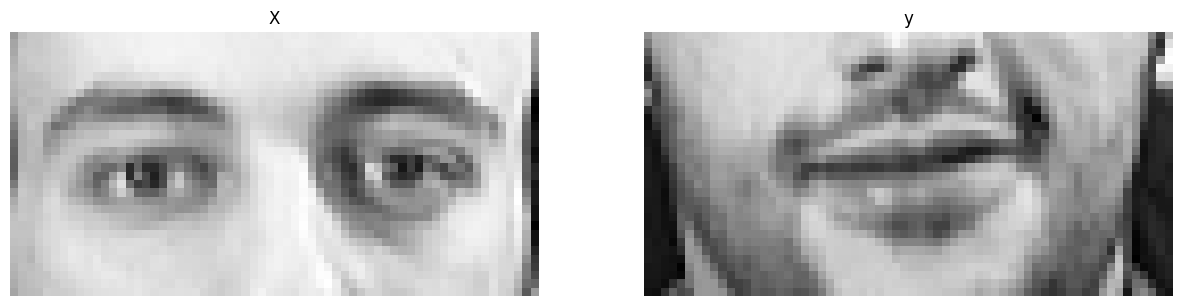

In [ ]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx].reshape((32, 64)), cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx].reshape((32, 64)), cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

#### 6.1. Обучите модель KNN и назовите переменную с моделью knn на 100 соседях

In [74]:
knn = KNeighborsRegressor(n_neighbors=100)

knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100)

#### 6.2. Проверьте качество работы модели

При этом предсказания модели запишите в словарь pred_test с ключом knn.


In [75]:
pred_knn = knn.predict(X_test)

In [76]:
from sklearn.metrics import r2_score #коэффициент детерминации (R2 = 1 - (mse_model / mse_mean) )

r2_score(pred_knn, y_test)

-11.693276577608428

#### 6.3. Обучите модель KNN с весами по дистанции и назовите переменную с моделью weighted_knn на 100 соседях

In [77]:
knn_weighted = KNeighborsRegressor(n_neighbors=100, weights='distance')

knn_weighted.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100, weights='distance')

#### 6.4. Проверьте качество работы модели

При этом предсказания модели запишите в словарь pred_test с ключом weighted_knn.


In [78]:
pred_weighted_knn = knn_weighted.predict(X_test)


In [79]:
from sklearn.metrics import r2_score #коэффициент детерминации (R2 = 1 - (mse_model / mse_mean) )

r2_score(pred_weighted_knn, y_test)

-9.723678421559578

#### 6.5. Напишите свою функцию подсчета весов по дистанции

(Можете выбрать любой подход)


In [80]:
def calculate_distance_weights(distances):

    distances = np.where(distances == 0, 1e-6, distances)

    weights = 1.0 / distances

    return weights

#### 6.6. Обучите модель KNN с кастомными весами по дистанции и назовите переменную с моделью weighted_knn_custom на 100 соседях

In [81]:
from sklearn.neighbors import KNeighborsRegressor
knn_custom = KNeighborsRegressor(n_neighbors=100, weights=calculate_distance_weights)

knn_custom.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100,
                    weights=<function calculate_distance_weights at 0x7ba1c37579a0>)

#### 6.7. Проверьте качество работы модели

При этом предсказания модели запишите в словарь pred_test с ключом weighted_knn_custom.


In [82]:
pred_custom_weighted_knn = knn_custom.predict(X_test)


In [83]:
from sklearn.metrics import r2_score #коэффициент детерминации (R2 = 1 - (mse_model / mse_mean) )

r2_score(pred_custom_weighted_knn, y_test)

-9.723678421559578

А сейчас отрисуем все предсказания.

In [62]:
pred_test = {'knn': pred_knn,
             'weighted_knn': pred_weighted_knn,
             'weighted_knn_custom': pred_custom_weighted_knn}

In [84]:
ESTIMATORS = pred_test

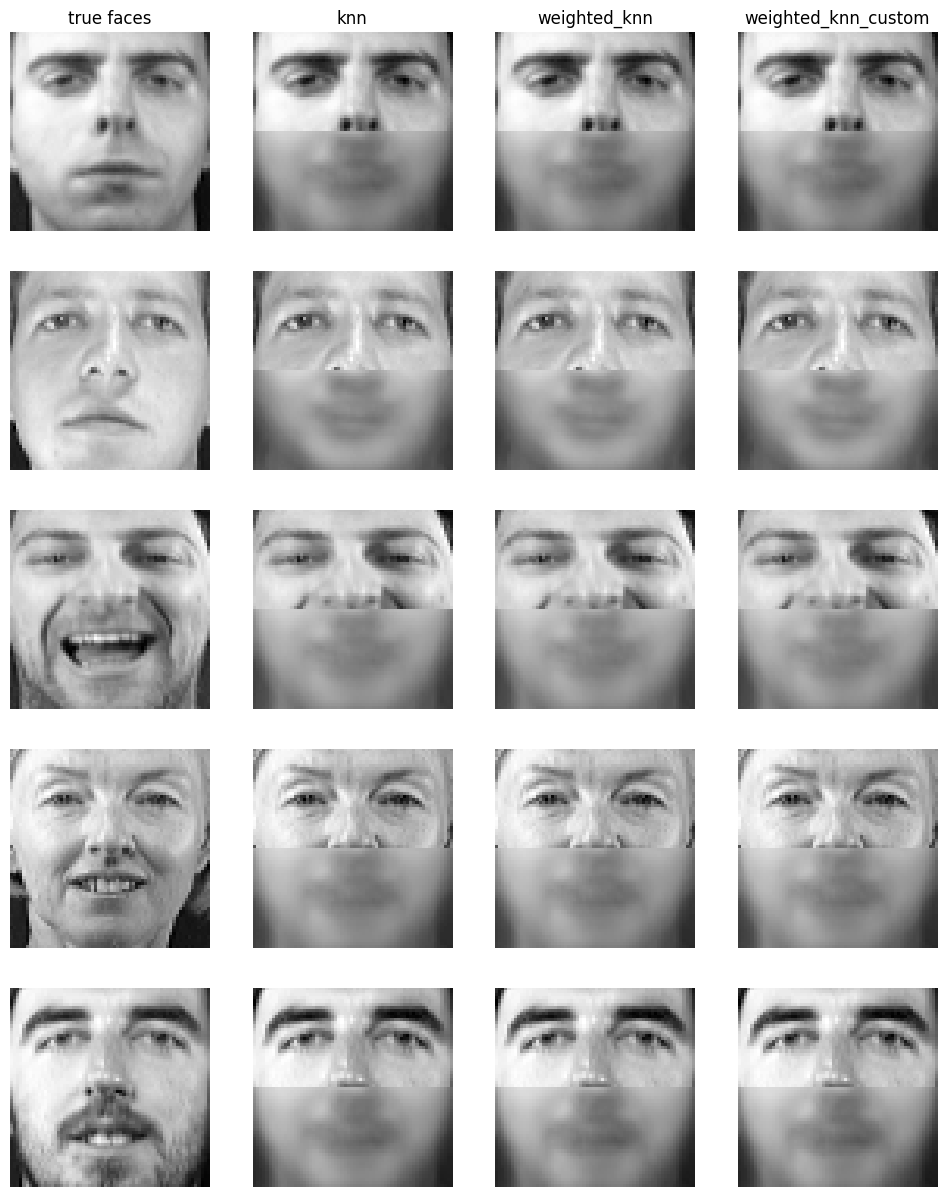

In [85]:
n_faces = 5
n_cols = 1 + len(ESTIMATORS)
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(5):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], pred_test[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )

#### 7*. Подберите лучшие гиперпараметры для модели, используя метод [GridSearchCV](https://scikit-learn.org/stable/modules/grid_search.html)

Примеры использования можно найти в технической документации, а также в следующих источниках:

[Пример 1](https://machinelearningknowledge.ai/knn-classifier-in-sklearn-using-gridsearchcv-with-example/#vii_Model_fitting_with_K-cross_Validation_and_GridSearchCV)


[Пример 2](https://vc.ru/ml/147132-kak-avtomaticheski-podobrat-parametry-dlya-modeli-mashinnogo-obucheniya-ispolzuem-gridsearchcv)

In [86]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
}

knn = KNeighborsRegressor()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [87]:
best_model_predict = best_model.predict(X_test)


In [88]:
r2_score(best_model_predict, y_test)

0.28254895365467503

In [91]:
ESTIMATORS = {'knn': pred_knn,
             'weighted_knn': pred_weighted_knn,
             'weighted_knn_custom': pred_custom_weighted_knn,
             'best_model': best_model_predict
             }

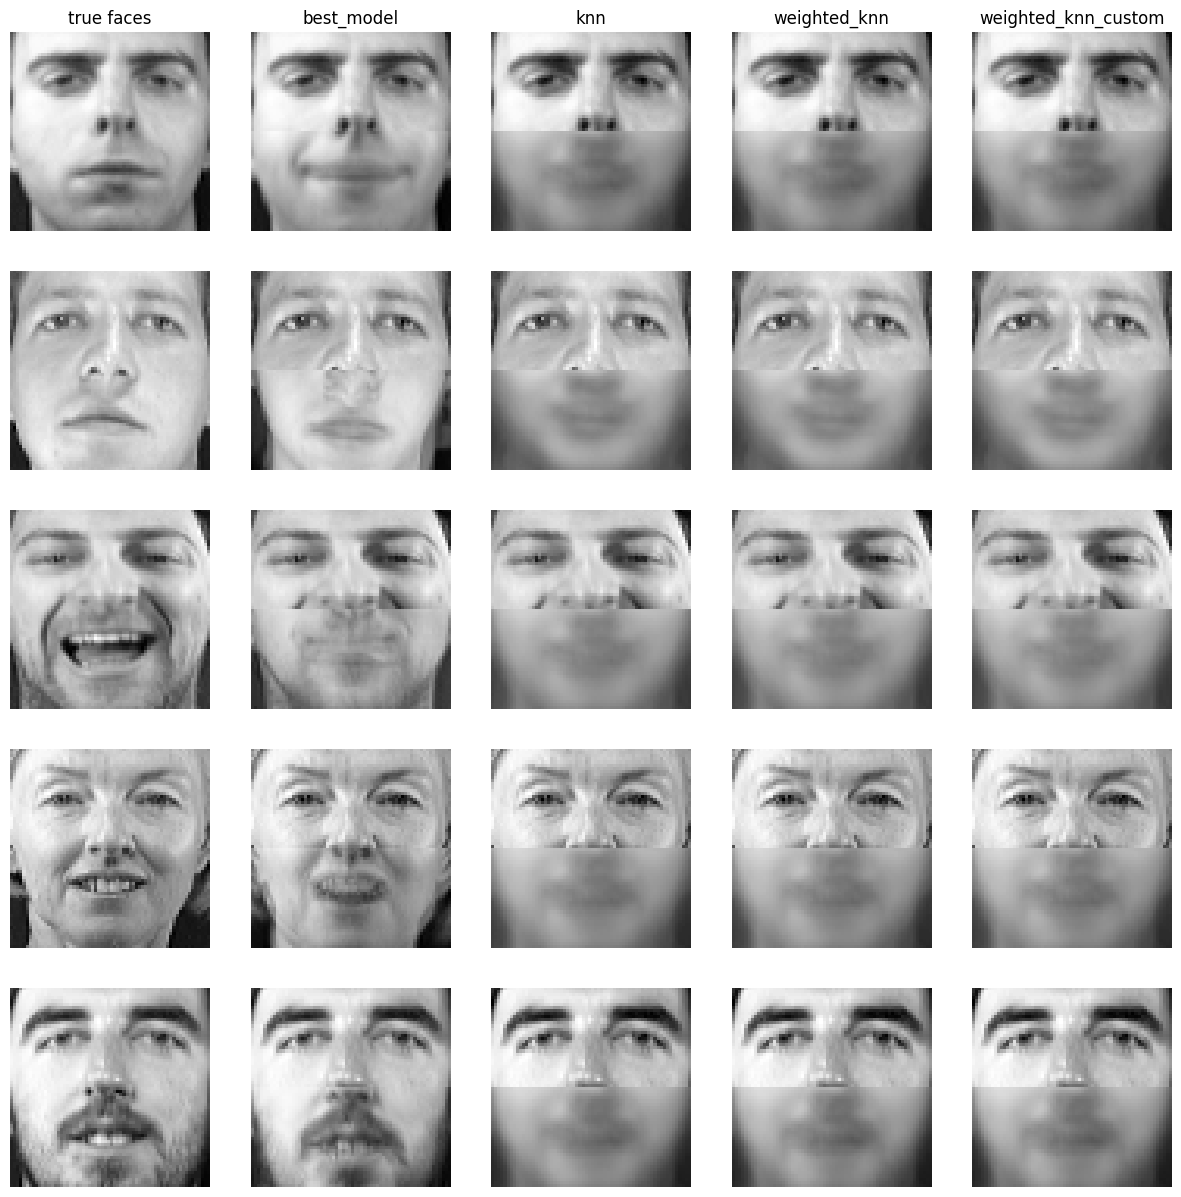

In [92]:
n_faces = 5
n_cols = 1 + len(ESTIMATORS)
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(5):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], pred_test[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )